## Fuzzywuzzy pizzasession

Fuzzywuzzy github: https://github.com/seatgeek/fuzzywuzzy

In order to match strings, fuzzywuzzy uses SequenceMatcher from difflib, which is essentially Ratcliff/Obershelp algorithm. Here you can read more about it: https://ilyankou.files.wordpress.com/2015/06/ib-extended-essay.pdf

If you want SequenceMatcher to be fast, you need C implementation (with python-Levenshtein):

1) Install VC++2008 for python2.7 and VC++2010 for python3.x 

2) Go to command line and run easy_install python-Levenshtein


Used this tutorial: https://marcobonzanini.com/2015/02/25/fuzzy-string-matching-in-python/.
Found the explanation bad and made it better :-)

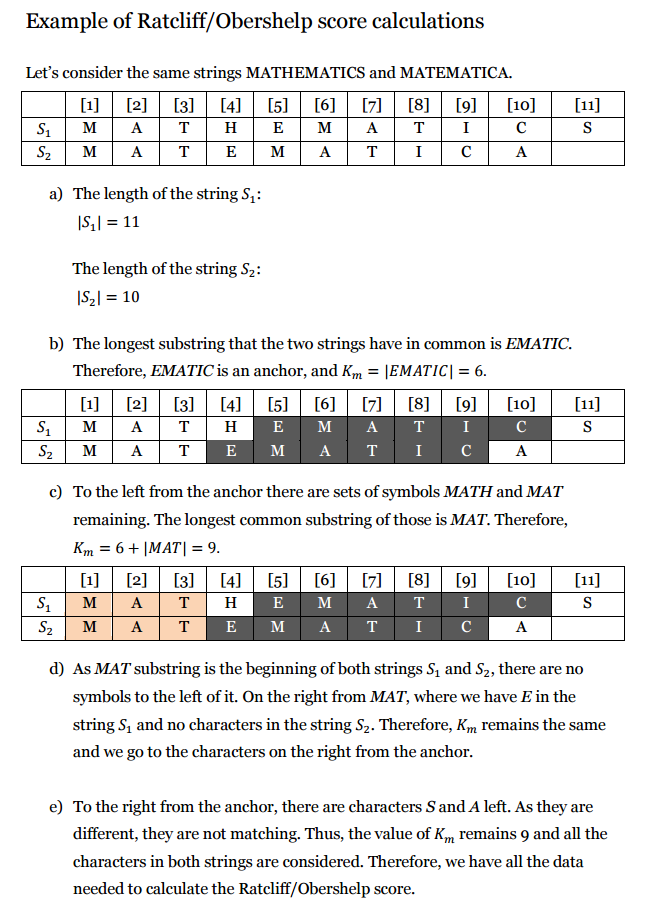

In [1]:
from IPython.display import Image
Image(filename='ratcliff-obershelp.png')

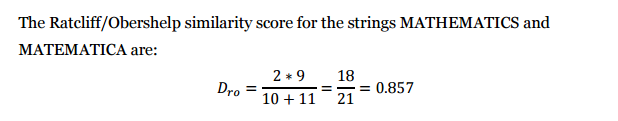

In [2]:
from IPython.display import Image
Image(filename='ratcliff-obershelp1.png')

## Examples fuzzywuzzy code

In [3]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

### fuzz.ratio: original implementation of Ratcliff/Oberschelp similarity, case/syntax sensitive

In [4]:
fuzz.ratio("ACME Factory", "ACME Factory Inc.")

83

In [16]:
float(2*len("ACME Factory"))/float((len("ACME Factory")+len("ACME Factory Inc.")))*100

82.75862068965517

In [8]:
fuzz.ratio("ACME", "ACME Factory Inc.")

38

In [36]:
float(2*4)/float((len("ACME Factory Inc.")+4))*100

38.095238095238095

### fuzz.partial_ratio: case/syntax sensitive; modification of fuzz.ratio: Takes a shorter string, finds the block of the same lenth in the longer string which looks the most like the shorter string, finds fuzz.ratio between them

In [7]:
fuzz.partial_ratio("ACME Factory Inc.", "ACME Factory")

100

In [17]:
fuzz.partial_ratio("ACME", "ACME Factory Inc.")

100

In [18]:
fuzz.partial_ratio("AME", "ACME Factory Inc.")

67

In [21]:
fuzz.ratio("AME", "CME")

67

In [50]:
fuzz.partial_ratio('barack obama', 'barack blabla obama')

75

In [51]:
fuzz.ratio('barack obama', 'barack blabl')

75

###fuzz.token_sort_ratio: the same as ratio, but everything except [^a-zA-Z] ignored and all lowercase

In [25]:
fuzz.token_sort_ratio('Barack Obama', 'Barack H. Obama')

92

In [26]:
fuzz.token_sort_ratio('barack obama', 'barack h obama')

92

In [27]:
fuzz.ratio('barack obama', 'barack h obama')

92

###fuzz.token_set_ratio: everything except [^a-zA-Z] ignored and all lowercase

### The procedure is the following:

1. Split both strings into lists of words

2. Define intersection of lists of words (sorted_sect)

3. Define elements which are in the 1st list but not in the 2nd list (diff1to2). Create a string combined_1to2, which is sorted_sect+diff1to2

4. Define elements which are in the 2nd list but not in the 1st list (diff2to1). Create a string combined_2to1, which is sorted_sect+diff2to1

5. Score is max of the following matches:
        fuzz.ratio(sorted_sect, combined_1to2),
        fuzz.ratio(sorted_sect, combined_2to1),
        fuzz.ratio(combined_1to2, combined_2to1)

In [29]:
fuzz.token_set_ratio('Barack Obama', 'Barack H. Obama')

100

In [49]:
fuzz.token_set_ratio('barack obama', 'barack blabla obama')

100

In [73]:
print "fuzz.ratio('barack obama', 'barack obama')        is {}".format(fuzz.ratio('barack obama', 'barack obama'))
print "fuzz.ratio('barack obama', 'barack obama blabla') is {}".format(fuzz.ratio('barack obama', 'barack obama blabla'))
print "fuzz.ratio('barack obama', 'barack obama blabla') is {}".format(fuzz.ratio('barack obama', 'barack obama blabla'))

fuzz.ratio('barack obama', 'barack obama')        is 100
fuzz.ratio('barack obama', 'barack obama blabla') is 77
fuzz.ratio('barack obama', 'barack obama blabla') is 77


In [52]:
fuzz.token_set_ratio('baracka obama', 'barack blabla obama')

81

In [74]:
print "fuzz.ratio('obama', 'obama baracka')               is {}".format(fuzz.ratio('obama', 'obama baracka'))
print "fuzz.ratio('obama', 'obama barack blabla')         is {}".format(fuzz.ratio('obama', 'obama barack blabla'))
print "fuzz.ratio('obama baracka', 'obama barack blabla') is {}".format(fuzz.ratio('obama baracka', 'obama barack blabla'))

fuzz.ratio('obama', 'obama baracka')               is 56
fuzz.ratio('obama', 'obama barack blabla')         is 42
fuzz.ratio('obama baracka', 'obama barack blabla') is 81


###fuzz.partial_token_set_ratio: the same as token_set_ratio with difference in step 5 (partial_ratio is used instead of ratio):

        fuzz.partial_ratio(sorted_sect, combined_1to2),
        fuzz.partial_ratio(sorted_sect, combined_2to1),
        fuzz.partial_ratio(combined_1to2, combined_2to1)

In [76]:
fuzz.partial_token_set_ratio('baracka obama', 'barack blabla obama')

100

In [77]:
print "fuzz.partial_ratio('obama', 'obama baracka')               is {}".format(fuzz.partial_ratio('obama', 'obama baracka'))
print "fuzz.partial_ratio('obama', 'obama barack blabla')         is {}".format(fuzz.partial_ratio('obama', 'obama barack blabla'))
print "fuzz.partial_ratio('obama baracka', 'obama barack blabla') is {}".format(fuzz.partial_ratio('obama baracka', 'obama barack blabla'))

fuzz.partial_ratio('obama', 'obama baracka')               is 100
fuzz.partial_ratio('obama', 'obama barack blabla')         is 100
fuzz.partial_ratio('obama baracka', 'obama barack blabla') is 92


### process.exract: gives you scores for all choices for the query. Default scoring method is ratio

In [78]:
query = 'Barack Obama'
choices = ['Barack H Obama', 'Barack H. Obama', 'B. Obama']

In [81]:
process.extract(query, choices)
#process.extract(query, choices, limit=2) - will give you only 2 results

[('Barack H Obama', 95), ('Barack H. Obama', 95), ('B. Obama', 86)]

In [87]:
# easy to select only results with high enough scores
[x for x in process.extract(query, choices) if x[1]>90]

[('Barack H Obama', 95), ('Barack H. Obama', 95)]

In [86]:
process.extractOne(query, choices)

('Barack H Obama', 95)

In [85]:
## you can choose another scorer. You can even make your own!
process.extractOne(query, choices,scorer=fuzz.partial_ratio)

('Barack H Obama', 75)